Temp - Mean: 76.13, Median: 76.01, Std Dev: 0.96
Feels - Mean: 76.34, Median: 76.09, Std Dev: 1.06


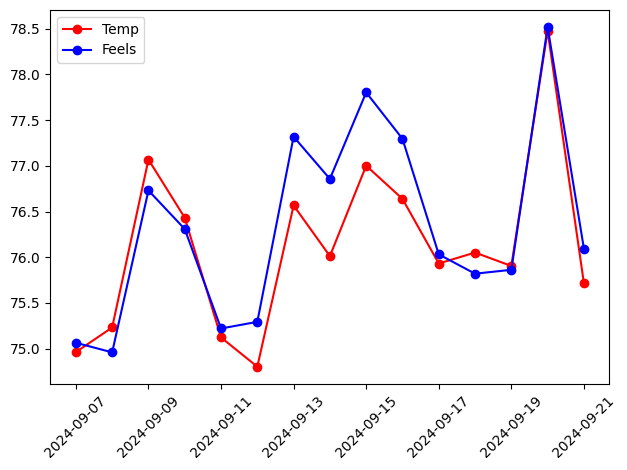

In [1]:
import pandas as pd
from lib import load, DataFrame, Graph

file_path = "./files"
file_name = "Urban-Air-Quality and-Health-Impact-Dataset.csv"

dataframe = DataFrame(load(file_path, file_name))
df = dataframe.get_df()
df.describe()
df.head()
df["datetime"] = pd.to_datetime(df["datetime"])
df_grouped = (
    df.groupby(df["datetime"].dt.date)
    .agg(avgt=("temp", "mean"), avgf=("feelslike", "mean"))
    .reset_index()
)
df_grouped.head()
df_grouped.describe()

graph = Graph(df_grouped, df_grouped["datetime"])
graph.set_dependent_variables(
    [
        {"data": df_grouped["avgt"], "label": "Temp", "co": "r"},
        {"data": df_grouped["avgf"], "label": "Feels", "co": "b"},
    ]
)
graph.set_title("Average Temperature and Feels Like Over Time")
graph.set_x_label("Date")
graph.set_y_label("Values")
graph.plot_and_show_graph()